<a href="https://colab.research.google.com/github/unChris666/Data-Analysis-with-Python-by-Jovian/blob/main/Lesson/Lesson%206%20-%20Exploratory%20Data%20Analysis%20-%20A%20Case%20Study/zerotopandas-course-project-starter-v-20/zerotopandas-course-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb Movies Data Collection

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

## Downloading the Dataset

**TODO** - add some explanation here

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install opendatasets forex-python --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 7.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import re
from collections import Counter

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/hetbabariya/imdb-movies-data-collection-5000-records/'

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chrisbiran
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hetbabariya/imdb-movies-data-collection-5000-records


100%|██████████| 934k/934k [00:00<00:00, 1.84MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './imdb-movies-data-collection-5000-records'

In [6]:
import os
os.listdir(data_dir)

['IMDB_Movies_Dataset.csv']

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [7]:
movies_raw_df = pd.read_csv('/content/imdb-movies-data-collection-5000-records/IMDB_Movies_Dataset.csv')
movies_raw_df.columns

Index(['Unnamed: 0', 'Title', 'Average Rating', 'Director', 'Writer',
       'Metascore', 'Cast', 'Release Date', 'Country of Origin', 'Languages',
       'Budget', 'Worldwide Gross', 'Runtime'],
      dtype='object')

In [8]:
# Apply transformation to the 'Director' column
# movies_raw_df['List Director'] = movies_raw_df['Director'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [9]:
# Apply transformation to the 'Writer' column
# movies_raw_df['List Writer'] = movies_raw_df['Writer'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [10]:
# Apply transformation to the 'Cast' column
# movies_raw_df['List Cast'] = movies_raw_df['Cast'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [11]:
# Apply transformation to the 'Country of Origin' column
# movies_raw_df['List Country of Origin'] = movies_raw_df['Country of Origin'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [12]:
# Apply transformation to the 'Languages' column
# movies_raw_df['List Languages'] = movies_raw_df['Languages'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

Release date convert into month, year and country

In [13]:
# Function to extract the required details from the Release Date string
def extract_release_info(release_str):
    try:
        # Check if the format is like 'YYYY (Country)' or 'Month Day, Year (Country)'
        match = re.match(r'([a-zA-Z]+(?: [0-9]{1,2})?)?,? ([0-9]{4}) \((.*?)\)', release_str)

        if match:
            # Extract month (if present) and split it from day if necessary
            release_month = match.group(1).split()[0] if match.group(1) else None
            release_year = match.group(2)
            release_country = match.group(3)
            return pd.Series([release_month, release_year, release_country])
        else:
            # Handle cases like '1978 (Country)' or other mismatched formats
            match_year_country = re.match(r'([0-9]{4}) \((.*?)\)', release_str)
            if match_year_country:
                return pd.Series([None, match_year_country.group(1), match_year_country.group(2)])
            else:
                return pd.Series([None, None, None])
    except Exception as e:
        print(f"Error: {e}")
        return pd.Series([None, None, None])

# Apply the extraction function and assign to new columns
movies_raw_df[['Release Month', 'Release Year', 'Release Country']] = movies_raw_df['Release Date'].apply(extract_release_info)

Budget and Gross convert into USD

In [14]:
# Predefined exchange rates
preloaded_rates = {
    'INR': 0.012,  # Example: 1 INR = 0.012 USD
    'EUR': 1.10,   # Example: 1 EUR = 1.10 USD
    'GBP': 1.25,   # Example: 1 GBP = 1.25 USD
    'HKD': 0.13,   # Example: 1 HKD = 0.13 USD
    'FRF': 0.17,   # Example: 1 FRF = 0.17 USD
    'NOK': 0.10,   # Example: 1 NOK = 0.10 USD
    'IRR': 0.000024,  # Example: 1 IRR = 0.000024 USD
    'HUF': 0.0027,  # Example: 1 HUF = 0.0027 USD
    'THB': 0.029,   # Example: 1 THB = 0.029 USD
    'BDT': 0.0094,  # Example: 1 BDT = 0.0094 USD
    'DKK': 0.14,    # Example: 1 DKK = 0.14 USD
    'LVL': 1.62,    # Example: 1 LVL = 1.62 USD
    'SEK': 0.11,    # Example: 1 SEK = 0.11 USD
    'R$': 0.20,     # Example: 1 BRL = 0.20 USD
    '¥': 0.0072,    # Example: 1 JPY = 0.0072 USD
    'PKR': 0.0035,  # Example: 1 PKR = 0.0035 USD
    'A$': 0.64,     # Example: 1 AUD = 0.64 USD
}

In [15]:
def convert_to_million_in_usd(value, default_currency_code='USD'):
    """
    Converts a given currency string to USD and returns the value in millions.

    Args:
        value (str): The input currency value as a string.
        default_currency_code (str): Default currency code to use if none is found.

    Returns:
        float: The value converted to USD and scaled to millions.
    """
    try:
        # Handle NaN or None values
        if pd.isna(value):
            return np.NaN

        # Remove "(estimated)" and clean the string
        value = re.sub(r'\(estimated\)', '', str(value)).strip()

        # Match currency symbol/code and numeric value
        matches = re.match(r'([^\d]+)?([\d,\.]+)', value)
        if matches:
            symbol = matches.group(1).strip() if matches.group(1) else None
            numeric_value = matches.group(2).replace(',', '')
            amount = float(numeric_value)

            # Map symbols to currency codes
            symbol_to_code = {
                '$': 'USD',
                '₹': 'INR',
                '€': 'EUR',
                '£': 'GBP',
                '¥': 'JPY',
                'HK$': 'HKD',
                'FRF': 'FRF',
                'NOK': 'NOK',
                'IRR': 'IRR',
                'HUF': 'HUF',
                'THB': 'THB',
                'BDT': 'BDT',
                'DKK': 'DKK',
                'LVL': 'LVL',
                'SEK': 'SEK',
                'R$': 'R$',
                'A$': 'A$',
                'PKR': 'PKR',
            }
            currency_code = symbol_to_code.get(symbol, default_currency_code)

            # Convert to USD if currency code is not already USD
            if currency_code != 'USD' and currency_code in preloaded_rates:
                amount_in_usd = amount * preloaded_rates[currency_code]
            else:
                amount_in_usd = amount

            # Convert to millions and round to two decimals
            return round(amount_in_usd / 1_000_000, 2)
        else:
            return 0  # Return 0 for invalid format

    except Exception as e:
        print(f"Error converting currency: {e}")
        return 0

In [16]:
# Apply the conversion and create the new column
movies_raw_df['Budget in USD'] = movies_raw_df['Budget'].apply(convert_to_million_in_usd)

movies_raw_df['Gross in USD'] = movies_raw_df['Worldwide Gross'].apply(convert_to_million_in_usd)

In [17]:
# Function to convert the runtime string into minutes
def convert_runtime_to_minutes(runtime_str):
    try:
        # Match for hours and minutes in the format "X hours Y minutes" or "Y minutes"
        match = re.match(r'(?:(\d+) hours?)? ?(\d+) minutes?', runtime_str)

        if match:
            hours = int(match.group(1)) if match.group(1) else 0  # Default to 0 if no hours
            minutes = int(match.group(2))  # Minutes are always present

            # Convert total runtime into minutes
            total_minutes = (hours * 60) + minutes
            return total_minutes
        else:
            return 0  # Return 0 for invalid format
    except Exception as e:
        print(f"Error: {e}")
        return 0  # Return 0 in case of error

# Apply the conversion function to the 'Runtime' column
movies_raw_df['Runtime Minutes'] = movies_raw_df['Runtime'].apply(convert_runtime_to_minutes)

In [18]:
movies_raw_df.columns

Index(['Unnamed: 0', 'Title', 'Average Rating', 'Director', 'Writer',
       'Metascore', 'Cast', 'Release Date', 'Country of Origin', 'Languages',
       'Budget', 'Worldwide Gross', 'Runtime', 'Release Month', 'Release Year',
       'Release Country', 'Budget in USD', 'Gross in USD', 'Runtime Minutes'],
      dtype='object')

In [19]:
selected_column = [
     'Title', 'Average Rating', 'Director', 'Writer',
       'Metascore', 'Cast', 'Country of Origin', 'Languages', 'Release Month', 'Release Year',
       'Release Country', 'Budget in USD', 'Gross in USD', 'Runtime Minutes'
]

In [20]:
movies_df = movies_raw_df[selected_column]
movies_df.head()

,Title,Average Rating,Director,Writer,Metascore,Cast,Country of Origin,Languages,Release Month,Release Year,Release Country,Budget in USD,Gross in USD,Runtime Minutes
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",United States,English,October,1994,India,25.0,29.33,142
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...",Japan,Japanese,November,2024,Japan,NaN,3.51,145
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",United States,"English, Italian, Latin",None,1978,India,6.0,250.34,175
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...",Turkey,Turkish,April,1975,Turkey,NaN,NaN,85
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","India, Japan",English,September,2001,India,NaN,NaN,135


## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
>
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

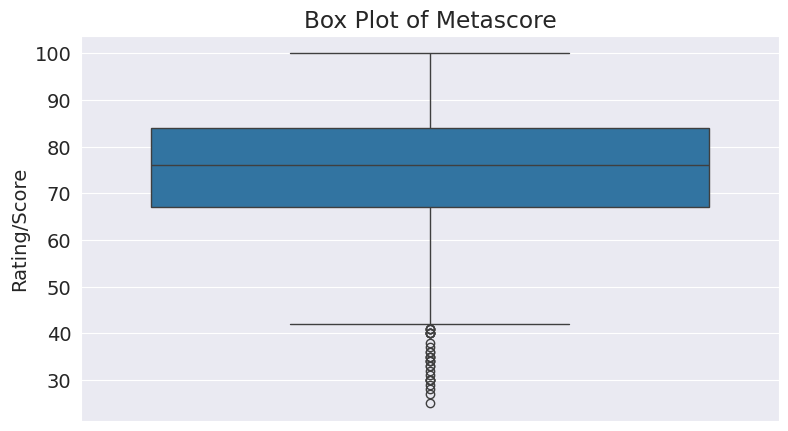

In [22]:
sns.boxplot(data=movies_df['Metascore'])
plt.title('Box Plot of Metascore')
plt.ylabel('Rating/Score')
plt.show()

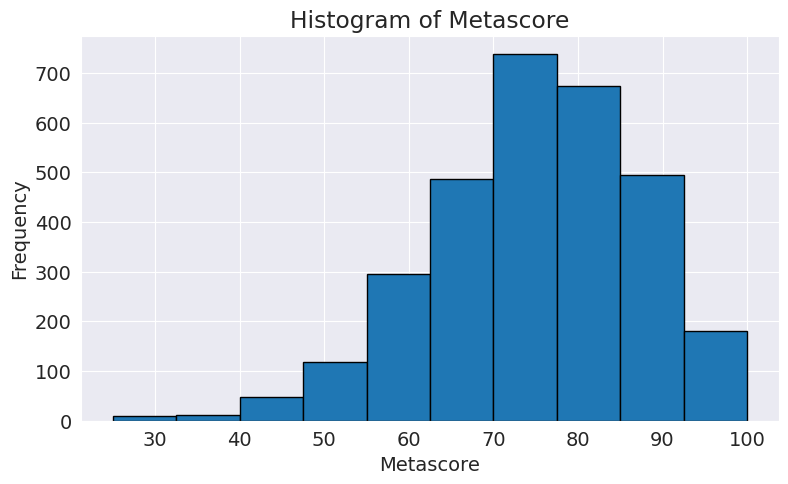

In [27]:
plt.hist(movies_df['Metascore'], bins=10, edgecolor='black')
plt.title('Histogram of Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

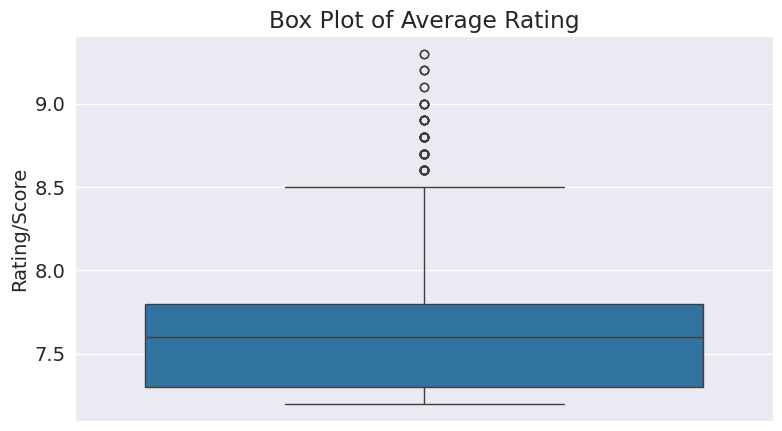

In [28]:
sns.boxplot(data=movies_df['Average Rating'])
plt.title('Box Plot of Average Rating')
plt.ylabel('Rating/Score')
plt.show()

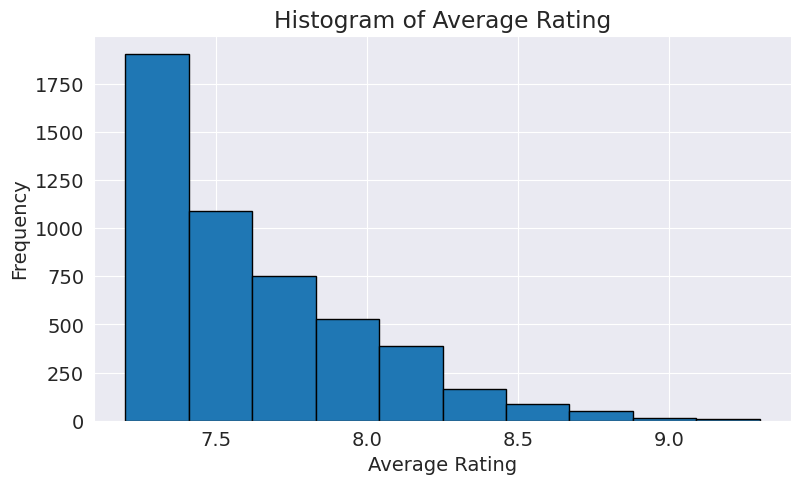

In [29]:
plt.hist(movies_df['Average Rating'], bins=10, edgecolor='black')
plt.title('Histogram of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

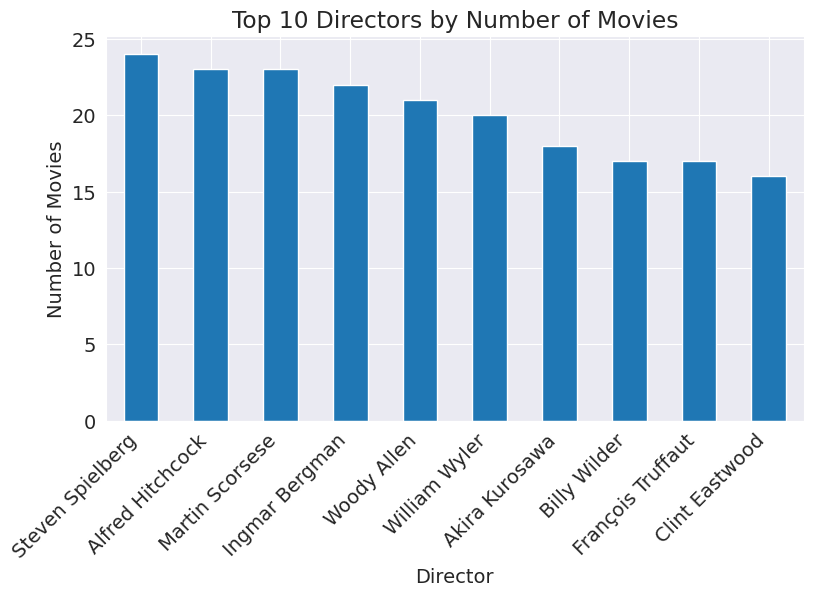

In [30]:
movies_raw_df['Director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0, 0.5, 'Average Rating')

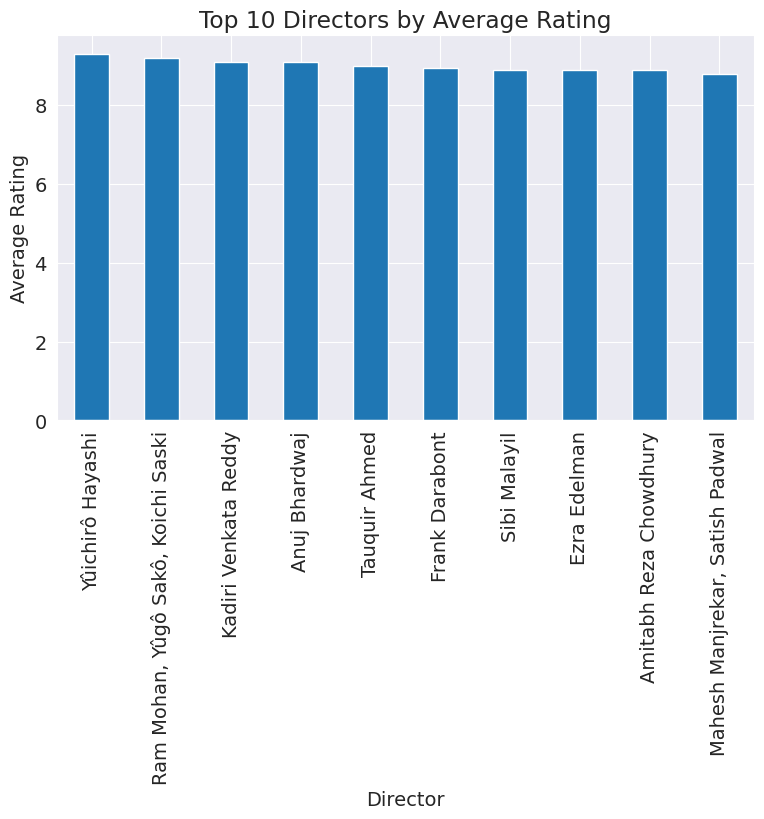

In [31]:
movies_raw_df.groupby('Director')['Average Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')

Text(0, 0.5, 'Metascore')

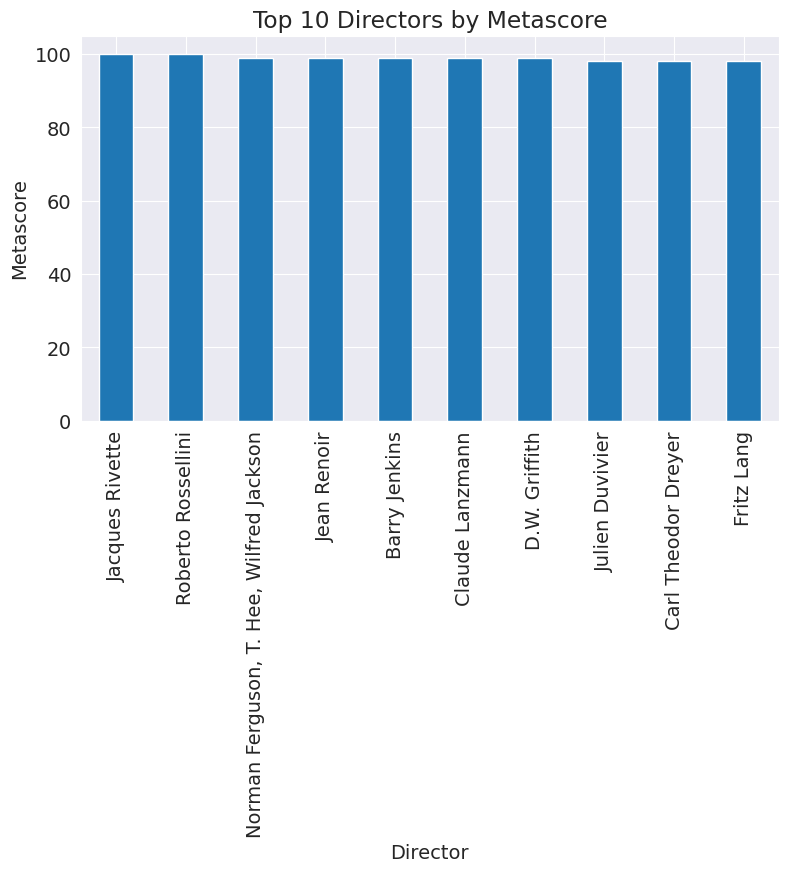

In [32]:
movies_raw_df.groupby('Director')['Metascore'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Directors by Metascore')
plt.xlabel('Director')
plt.ylabel('Metascore')

The director with the longest total runtime is: Steven Spielberg (3366 minutes)


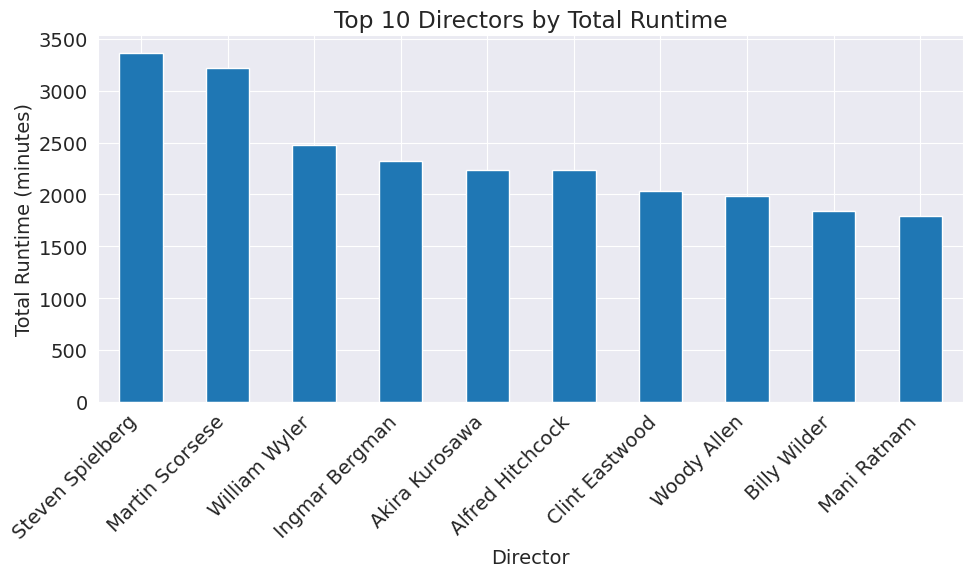

In [34]:
director_runtime = movies_df.groupby('Director')['Runtime Minutes'].sum()
longest_runtime_director = director_runtime.idxmax()
longest_runtime = director_runtime.max()

print(f"The director with the longest total runtime is: {longest_runtime_director} ({longest_runtime} minutes)")

# Create the bar plot
plt.figure(figsize=(10, 6))
director_runtime.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Directors by Total Runtime')
plt.xlabel('Director')
plt.ylabel('Total Runtime (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

The director with the longest average runtime is: Claude Lanzmann (566.0 minutes)


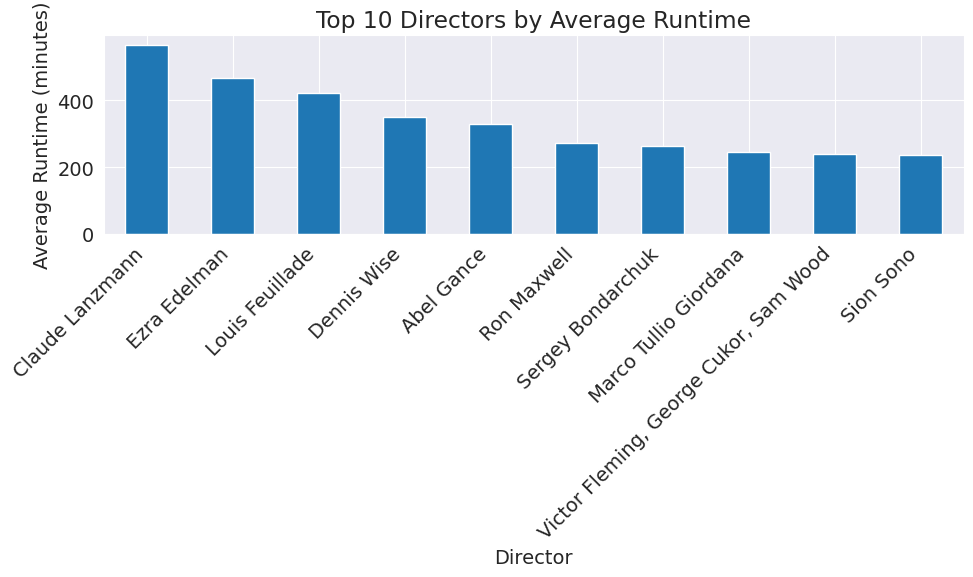

In [36]:
# Calculate the average runtime for each director
director_avg_runtime = movies_df.groupby('Director')['Runtime Minutes'].mean()

# Find the director with the longest average runtime
longest_avg_runtime_director = director_avg_runtime.idxmax()
longest_avg_runtime = director_avg_runtime.max()

print(f"The director with the longest average runtime is: {longest_avg_runtime_director} ({longest_avg_runtime} minutes)")

# Create the bar plot for average runtime
plt.figure(figsize=(10, 6))
director_avg_runtime.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Directors by Average Runtime')
plt.xlabel('Director')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-40-84400301bc3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['Profit'] = movies_df['Gross in USD'] - movies_df['Budget in USD']


The most profitable director (by average profit) is: Kelsey Mann with an average profit of $1498.45 million


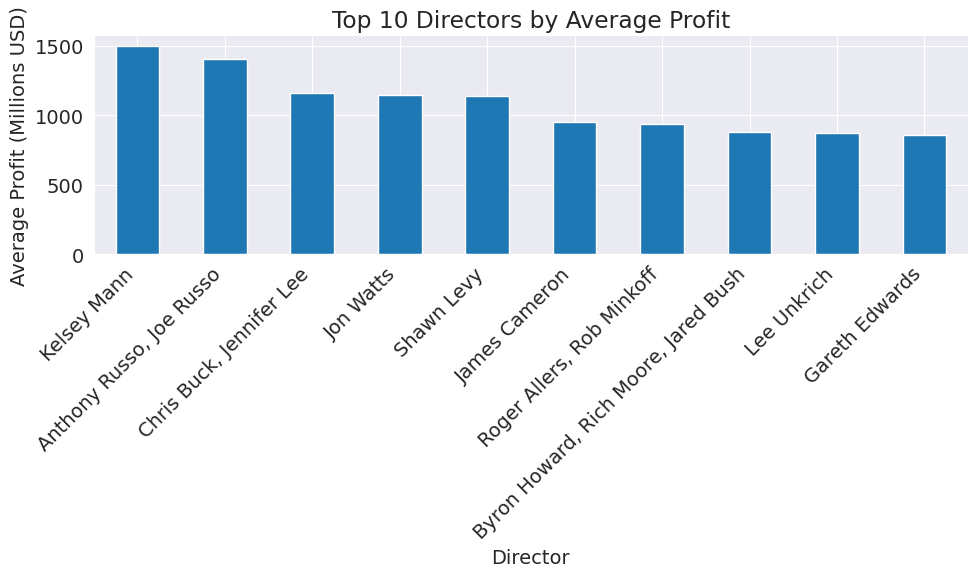

In [40]:
# Calculate the average profit for each director
movies_df['Profit'] = movies_df['Gross in USD'] - movies_df['Budget in USD']
director_avg_profit = movies_df.groupby('Director')['Profit'].mean()

# Find the director with the highest average profit
most_profitable_director = director_avg_profit.idxmax()
highest_avg_profit = director_avg_profit.max()

print(f"The most profitable director (by average profit) is: {most_profitable_director} with an average profit of ${highest_avg_profit:.2f} million")

# Create the bar plot for average profit
plt.figure(figsize=(10, 6))
director_avg_profit.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Directors by Average Profit')
plt.xlabel('Director')
plt.ylabel('Average Profit (Millions USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout();
plt.show();

<ipython-input-47-27875b43e173>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['Profit'] = movies_df['Gross in USD'] - movies_df['Budget in USD']


The most profitable director (by profit) is: James Cameron with an profit of $7606.42 million


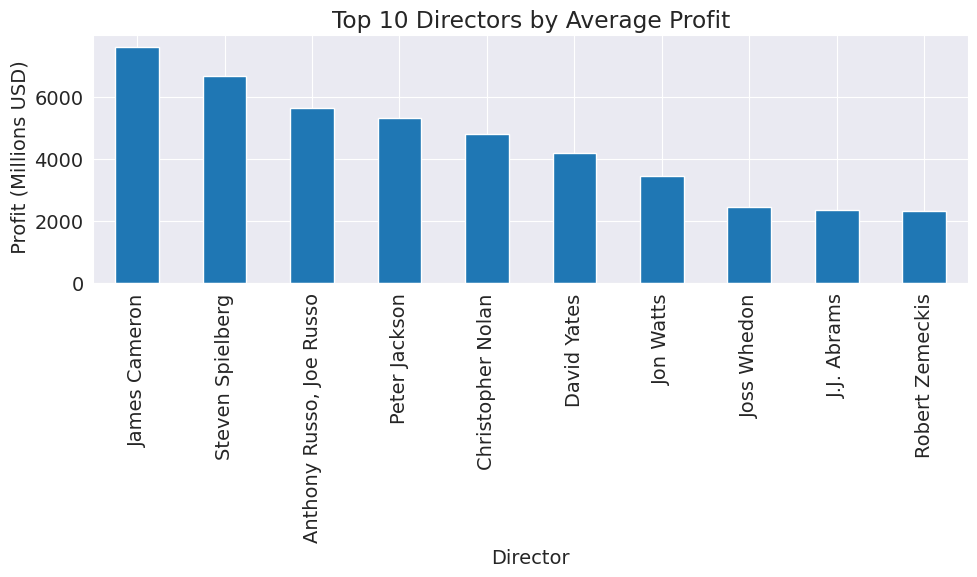

In [47]:
# Calculate the  profit for each director
movies_df['Profit'] = movies_df['Gross in USD'] - movies_df['Budget in USD']
director_avg_profit = movies_df.groupby('Director')['Profit'].sum()

# Find the director with the highest  profit
most_profitable_director = director_avg_profit.idxmax()
highest_avg_profit = director_avg_profit.max()

print(f"The most profitable director (by profit) is: {most_profitable_director} with an profit of ${highest_avg_profit:.2f} million")

# Create the bar plot for  profit
plt.figure(figsize=(10, 6))
director_avg_profit.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Directors by Average Profit')
plt.xlabel('Director')
plt.ylabel(' Profit (Millions USD)')
plt.tight_layout();
plt.show();

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0, 0.5, 'Number of Movies')

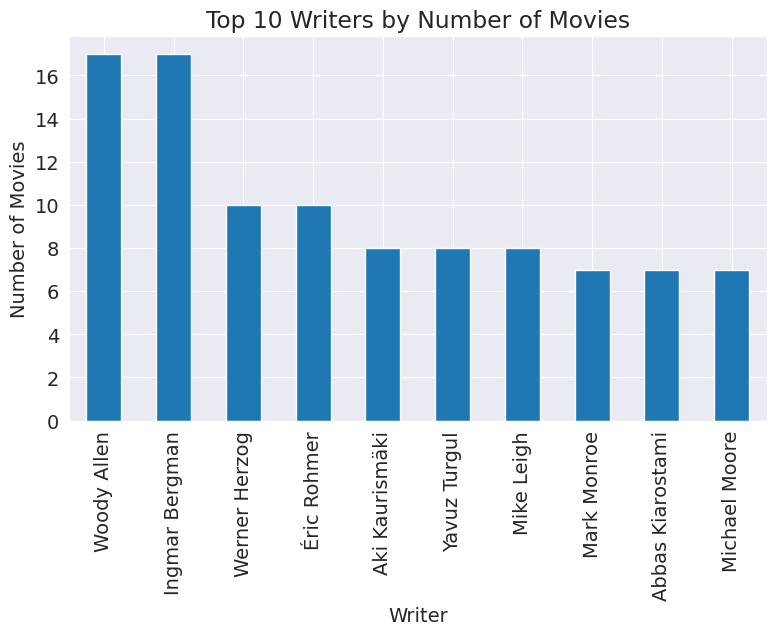

In [43]:
movies_df['Writer'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Writers by Number of Movies')
plt.xlabel('Writer')
plt.ylabel('Number of Movies')

In [52]:
# Calculate the average profit for each writer
writer_avg_profit = movies_df.groupby('Writer')['Profit'].mean()

# Find the top 10 most profitable writers
top_10_writers = writer_avg_profit.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 Most Profitable Writers (by average profit):")
print(top_10_writers)

# # Create the bar plot for average profit
# plt.figure(figsize=(12, 6))
# top_10_writers.plot(kind='bar')
# plt.title('Top 10 Writers by Average Profit')
# plt.xlabel('Writer')
# plt.ylabel('Average Profit (Millions USD)')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

Top 10 Most Profitable Writers (by average profit):
Writer
Christopher Markus, Stephen McFeely, Stan Lee        2087.430
James Cameron, Rick Jaffa, Amanda Silver             1970.250
Lawrence Kasdan, J.J. Abrams, Michael Arndt          1826.310
James Cameron                                        1590.660
Meg LeFauve, Dave Holstein, Kelsey Mann              1498.450
Chris McKenna, Erik Sommers, Stan Lee                1362.715
Jim Cash, Jack Epps Jr., Peter Craig                 1325.700
Joss Whedon, Zak Penn                                1300.540
Jennifer Lee, Hans Christian Andersen, Chris Buck    1156.450
Joss Whedon, Stan Lee, Jack Kirby                    1155.020
Name: Profit, dtype: float64


In [53]:
# Calculate the  profit for each writer
writer_avg_profit = movies_df.groupby('Writer')['Profit'].sum()

# Find the top 10 most profitable writers
top_10_writers = writer_avg_profit.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 Most Profitable Writers (by profit):")
print(top_10_writers)

# top_10_writers.plot(kind='bar')
# plt.title('Top 10 Writers by Profit')
# plt.xlabel('Writer')
# plt.ylabel(' Profit (Millions USD)')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

Top 10 Most Profitable Writers (by profit):
Writer
James Cameron                                        4771.98
Christopher Markus, Stephen McFeely, Stan Lee        4174.86
Steve Kloves, J.K. Rowling                           3491.93
Chris McKenna, Erik Sommers, Stan Lee                2725.43
J.R.R. Tolkien, Fran Walsh, Philippa Boyens          2683.66
Fran Walsh, Philippa Boyens, Peter Jackson           2633.35
J.K. Rowling, Steve Kloves                           2362.45
James Cameron, Rick Jaffa, Amanda Silver             1970.25
Lawrence Kasdan, J.J. Abrams, Michael Arndt          1826.31
Jonathan Nolan, Christopher Nolan, David S. Goyer    1689.03
Name: Profit, dtype: float64


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [59]:
# Step 1: Split the cast names into a list (handle NaN values)
all_cast = movies_df['Cast'].dropna().str.split(', ')

# Step 2: Flatten the list of lists into a single list
flat_cast_list = [cast_member for cast_list in all_cast for cast_member in cast_list]

# Step 3: Count the occurrences of each cast member
cast_counts = Counter(flat_cast_list)

# Step 4: Get the top 10 cast members by appearance
top_10_cast = cast_counts.most_common(10)

# Convert to DataFrame for display
top_10_cast_df = pd.DataFrame(top_10_cast, columns=['Cast Member', 'Appearances'])

print(top_10_cast_df)

         Cast Member  Appearances
0        Prakash Raj           38
1             Nassar           37
2     Robert De Niro           30
3      Michael Caine           29
4  Samuel L. Jackson           29
5   Amitabh Bachchan           28
6       Willem Dafoe           27
7      James Stewart           26
8          Tom Hanks           25
9          Brad Pitt           24


In [64]:
# Step 1: Split the Country of Origin into a list (handle NaN values)
all_OriginCountry = movies_df['Country of Origin'].dropna().str.split(', ')

# Step 2: Flatten the list of lists into a single list
flat_OriginCountry_list = [OriginCountry_member for OriginCountry_list in all_OriginCountry for OriginCountry_member in OriginCountry_list]

# Step 3: Count the occurrences of each OriginCountry member
OriginCountry_counts = Counter(flat_OriginCountry_list)

# Step 4: Get the top 10 OriginCountry members by appearance
top_10_OriginCountry = OriginCountry_counts.most_common(10)

# Convert to DataFrame for display
top_10_OriginCountry_df = pd.DataFrame(top_10_OriginCountry, columns=['OriginCountry Member', 'Appearances'])

print(top_10_OriginCountry_df)

  OriginCountry Member  Appearances
0        United States         2486
1       United Kingdom          743
2               France          694
3                India          649
4              Germany          323
5                Japan          320
6                Italy          280
7               Canada          182
8                Spain          120
9               Turkey          119


In [65]:
# Step 1: Split the Languages into a list (handle NaN values)
all_Languages = movies_df['Languages'].dropna().str.split(', ')

# Step 2: Flatten the list of lists into a single list
flat_Languages_list = [Languages_member for Languages_list in all_Languages for Languages_member in Languages_list]

# Step 3: Count the occurrences of each Languages member
Languages_counts = Counter(flat_Languages_list)

# Step 4: Get the top 10 Languages members by appearance
top_10_Languages = Languages_counts.most_common(10)

# Convert to DataFrame for display
top_10_Languages_df = pd.DataFrame(top_10_Languages, columns=['Languages Member', 'Appearances'])

print(top_10_Languages_df)

  Languages Member  Appearances
0          English         3264
1           French          806
2           German          506
3          Spanish          478
4          Italian          374
5         Japanese          347
6            Hindi          338
7          Russian          248
8            Latin          167
9          Turkish          146


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<ipython-input-69-51145e88f1fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_months.values, y=top_months.index, palette='viridis')


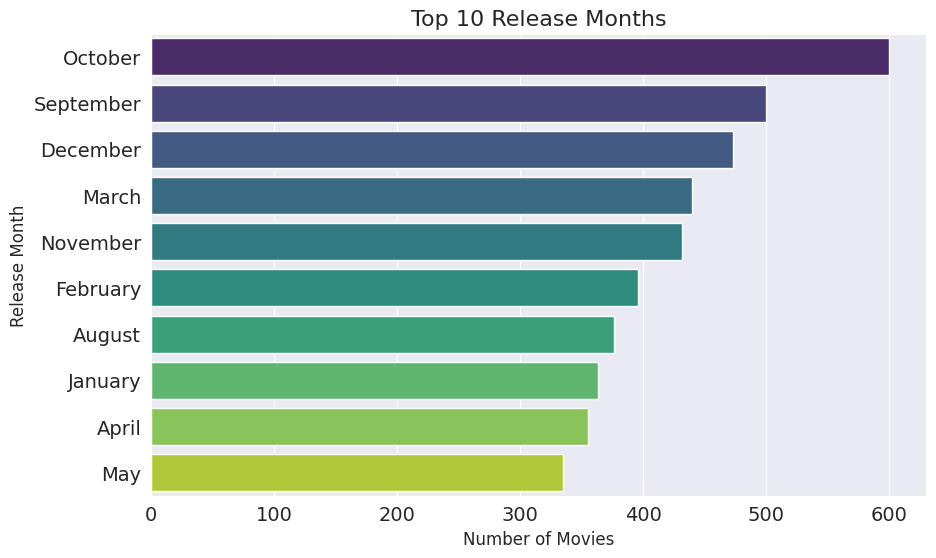

In [69]:
# Top 10 Release Months
top_months = movies_raw_df['Release Month'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_months.values, y=top_months.index, palette='viridis')
plt.title('Top 10 Release Months', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Release Month', fontsize=12)
plt.show()


<ipython-input-70-965ce1b7ad3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_years.values, y=top_years.index, palette='coolwarm')


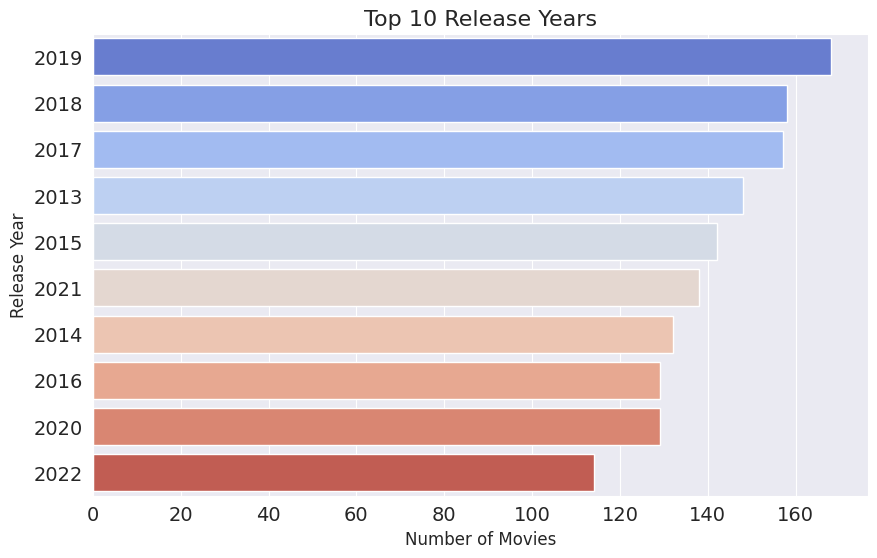

In [70]:
# Top 10 Release Years
top_years = movies_raw_df['Release Year'].value_counts().head(10)
sns.barplot(x=top_years.values, y=top_years.index, palette='coolwarm')
plt.title('Top 10 Release Years', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Release Year', fontsize=12)
plt.show()


<ipython-input-71-30a2b9596137>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='cubehelix')


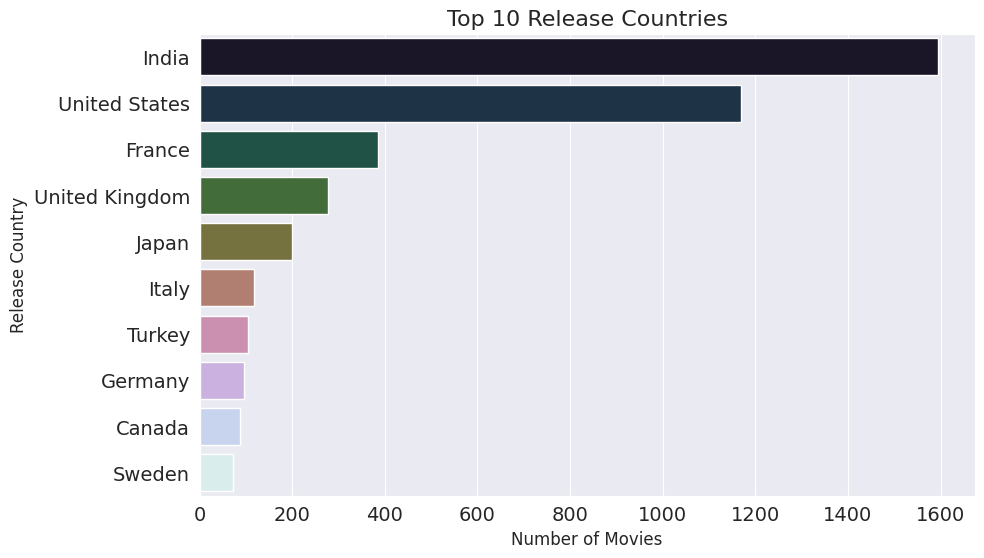

In [71]:
# Top 10 Release Countries
top_countries = movies_raw_df['Release Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cubehelix')
plt.title('Top 10 Release Countries', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Release Country', fontsize=12)
plt.show()


## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

#### Q2: TODO - ask a question here and answer it below

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
>
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
>
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml




In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'